##### 파이썬 주요 라이브러리
- geopandas : 데이터프레임 + 지리공간데이터
- Shapely : 점, 선, 다각형(polygon) 2D 기하 도형 객체를 조작
- PyProj : 지리 좌표계와 투영 좌표계간 변환
- Rasterio : 위성이미지 저장, 불러오고, numpy 변환시키는 등

##### Raster vs Vector
- Raster 데이터는 셀 또는 픽셀 그리드 표현
---> 위성 이미지, 항공사진 같은 시각화
---> 고도(Elevation, 온도)
- Vector
---> 점, 선, 다각형 특징을, 좌표
---> 빌딩의 경계, 호수, 강 지구의 표면적인 특징
---> 빌딩의 정보, 주소, 가격, 건축 날짜 이런 정보를 Polygon 형태에 저장을 시킬 수
<br/>
Shapefile
- 지리 공간 벡터 데이터의 파일 형태
-- 세가지 파일 형태(.shp, .shx, .dbf)로 구성되어 있음
-- .shp : vector geometry 포함. (점, 선, 다각형)
-- .shx : 인덱스 파일. .shp 파일에 빠르게 접근할 수 있도록 도와주는 역할
-- .dbf : 각 vector 피처들의 속성 정보들이 포함

CRS(Coordinate Reference System)
- 좌표체계 : 위도 경도
- 세가지 유형
  : GCS - Geographic Coordinate Systems
    * 위도 및 경도 좌표 (WGS84, NAD83)
  : PCS - Projected Coordinate Systems
    * 투영 좌표계 - 곡면을 표면으로 변환하기 때문에, 거리, 방향, 면적에 왜곡이 발생할 수 있음
  : VCS - Vertical Coordinate Systems 해양과학, 해수면과 관련

In [10]:
# 라이브러리 불러오기
import geopandas as gpd
# import jupyterlab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [13]:
# 데이터 불러오기
world_gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # 내장 데이터셋의 파일 경로 반환
world_gdf.head()

<ipython-input-13-c0330297627f>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
from google.colab import drive # 구글 코랩에서 제공하는 drive 모듈을 가져옴
drive.mount("/content/drive") # 구글 드라이브를 마운트(연결)하는 코드

Mounted at /content/drive


In [16]:
DATA_PATH = '/content/drive/MyDrive/연세IT/map/'
states = gpd.read_file(DATA_PATH + 'ne_110m_admin_1_states_provinces.shp')
states.head(1)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."


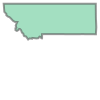

In [17]:
states['geometry'][1]

In [18]:
print(type(states))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [20]:
states.geom_type.head(4) # geometry의 유형 반환

0         Polygon
1         Polygon
2         Polygon
3    MultiPolygon
dtype: object

In [21]:
states.crs # 좌표 참조 시스템(CRS, Coordinate Reference System)정보를 반환하는 속성

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

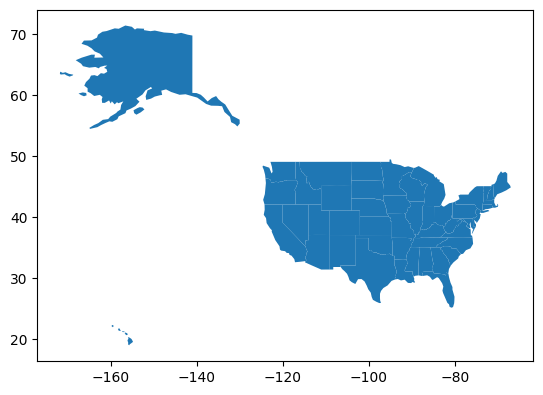

In [23]:
ax = states.plot()
plt.show()

GeoJSON 파일로 내보내기

In [24]:
states.to_file('my_file.json', driver = "GeoJSON")

GeoJSON 파일 불러오기

In [30]:
new_df = gpd.read_file(r'/content/my_file.json')

In [31]:
new_df

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."
6,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
8,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
9,Admin-1 scale rank,2,USA-3523,3523,US-NV,http://en.wikipedia.org/wiki/Nevada,US,1,Nevada,NV|Nev.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


데이터 매핑

In [32]:
import geopandas as gpd
import pandas as pd
import numpy as np
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

<ipython-input-32-230963538ff4>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [33]:
# 가상의 데이터 생성
data = pd.DataFrame({
    'name': world['name'],
    'data': np.random.randint(100, 1000, len(world))
})

data.head()

,name,data
0,Fiji,789
1,Tanzania,237
2,W. Sahara,730
3,Canada,938
4,United States of America,647


In [34]:
world_df = world.merge(data, on = 'name')
world_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,data
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",789
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",237
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",730
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",938
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",647
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",815
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",894
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",276
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",512


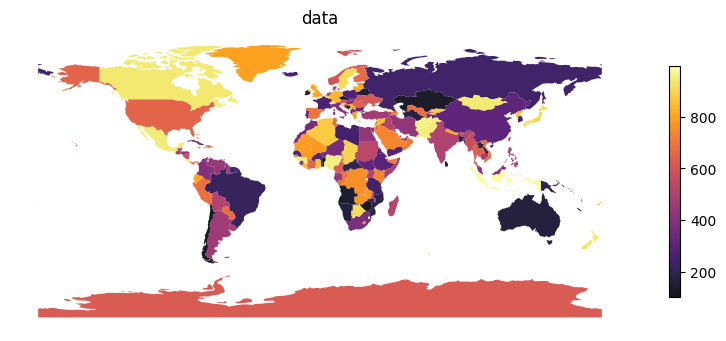

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
world_df.plot(ax = ax, column = "data", cmap = "inferno", legend = False, alpha = 0.9)
ax.set_title('data')
ax.set_axis_off()

cb = fig.colorbar(ax.collections[0], ax = ax, location = 'right', shrink = 0.5)
plt.show()